<a href="https://colab.research.google.com/github/melvinoimtiyazasyamsulhakim-DLI/MSCI-151/blob/main/GROUP_9_COIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Acquisition & Preprocessing Lead

In [11]:
import pandas as pd

Import the file

In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving EUR_IDR Historical Data.csv to EUR_IDR Historical Data (1).csv
Saving Gold Prices.csv to Gold Prices (1).csv
Saving Oil Prices.csv to Oil Prices (1).csv
Saving Global uncertainty index.csv to Global uncertainty index (1).csv
User uploaded file "EUR_IDR Historical Data (1).csv" with length 60066 bytes
User uploaded file "Gold Prices (1).csv" with length 66141 bytes
User uploaded file "Oil Prices (1).csv" with length 49589 bytes
User uploaded file "Global uncertainty index (1).csv" with length 305 bytes


In [13]:
euridr = pd.read_csv('EUR_IDR Historical Data.csv')
gold = pd.read_csv('Gold Prices.csv')
oil = pd.read_csv('Oil Prices.csv')
globaluncertainty = pd.read_csv('Global uncertainty index.csv')

print("euridr columns:", euridr.columns)
print("gold columns:", gold.columns)
print("oil columns:", oil.columns)
print("globaluncertainty columns:", globaluncertainty.columns)

euridr columns: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
gold columns: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
oil columns: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
globaluncertainty columns: Index(['observation_date', 'WUIGLOBALWEIGHTAVG'], dtype='object')


In [14]:
euridr = euridr[['Date', 'Price']]
gold = gold[['Date', 'Price']]
oil = oil[['Date', 'Price']]

print("euridr head after column selection:\n", euridr.head())
print("\ngold head after column selection:\n", gold.head())
print("\noil head after column selection:\n", oil.head())

euridr head after column selection:
        Date      Price
0  1/1/2021  17,246.30
1  1/4/2021  17,006.30
2  1/5/2021  17,091.40
3  1/6/2021  17,107.10
4  1/7/2021  17,043.00

gold head after column selection:
            Date     Price
0  Jan 04, 2021  1,946.60
1  Jan 05, 2021  1,954.40
2  Jan 06, 2021  1,908.60
3  Jan 07, 2021  1,913.60
4  Jan 08, 2021  1,835.40

oil head after column selection:
            Date  Price
0  Jan 04, 2021  47.76
1  Jan 05, 2021  50.01
2  Jan 06, 2021  50.69
3  Jan 07, 2021  50.87
4  Jan 08, 2021  52.26


In [15]:
print("Missing values in euridr:\n", euridr.isnull().sum())
print("\nMissing values in gold:\n", gold.isnull().sum())
print("\nMissing values in oil:\n", oil.isnull().sum())
print("\nMissing values in globaluncertainty:\n", globaluncertainty.isnull().sum())

Missing values in euridr:
 Date     0
Price    0
dtype: int64

Missing values in gold:
 Date     0
Price    0
dtype: int64

Missing values in oil:
 Date     0
Price    0
dtype: int64

Missing values in globaluncertainty:
 observation_date      0
WUIGLOBALWEIGHTAVG    0
dtype: int64


In [16]:
euridr['Date'] = pd.to_datetime(euridr['Date'], format='%m/%d/%Y')
gold['Date'] = pd.to_datetime(gold['Date'], format='%b %d, %Y')
oil['Date'] = pd.to_datetime(oil['Date'], format='%b %d, %Y')
globaluncertainty['observation_date'] = pd.to_datetime(globaluncertainty['observation_date'], format='%m/%d/%Y')

euridr['Price'] = euridr['Price'].str.replace(',', '').astype(float)
gold['Price'] = gold['Price'].str.replace(',', '').astype(float)
oil['Price'] = oil['Price'].astype(float)

print("euridr dtypes after conversion:\n", euridr.dtypes)
print("\ngold dtypes after conversion:\n", gold.dtypes)
print("\noil dtypes after conversion:\n", oil.dtypes)
print("\nglobaluncertainty dtypes after conversion:\n", globaluncertainty.dtypes)

euridr dtypes after conversion:
 Date     datetime64[ns]
Price           float64
dtype: object

gold dtypes after conversion:
 Date     datetime64[ns]
Price           float64
dtype: object

oil dtypes after conversion:
 Date     datetime64[ns]
Price           float64
dtype: object

globaluncertainty dtypes after conversion:
 observation_date      datetime64[ns]
WUIGLOBALWEIGHTAVG           float64
dtype: object


In [17]:
globaluncertainty.rename(columns={'observation_date': 'Date'}, inplace=True)

merged_df = pd.merge(euridr, gold, on='Date', how='outer', suffixes=('_euridr', '_gold'))
merged_df = pd.merge(merged_df, oil, on='Date', how='outer', suffixes=('', '_oil'))
merged_df = pd.merge(merged_df, globaluncertainty, on='Date', how='outer', suffixes=('', '_globaluncertainty'))

merged_df.rename(
    columns={
        'Price_euridr': 'Price_euridr',
        'Price_gold': 'Price_gold',
        'Price': 'Price_oil',
        'WUIGLOBALWEIGHTAVG': 'GlobalUncertainty'
    },
    inplace=True
)

merged_df.sort_values(by='Date', inplace=True)

merged_df.ffill(inplace=True)

merged_df = merged_df[(merged_df['Date'] >= '2021-01-04') & (merged_df['Date'] <= '2024-06-30')]

merged_df.reset_index(drop=True, inplace=True)

print("Merged DataFrame head:\n", merged_df.head())
print("\nMerged DataFrame info:")
merged_df.info()
print("\nMissing values after cleaning:\n", merged_df.isnull().sum())


Merged DataFrame head:
         Date  Price_euridr  Price_gold  Price_oil  GlobalUncertainty
0 2021-01-04       17006.3      1946.6      47.76           18072.81
1 2021-01-05       17091.4      1954.4      50.01           18072.81
2 2021-01-06       17107.1      1908.6      50.69           18072.81
3 2021-01-07       17043.0      1913.6      50.87           21508.56
4 2021-01-08       17080.8      1835.4      52.26           21508.56

Merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               930 non-null    datetime64[ns]
 1   Price_euridr       930 non-null    float64       
 2   Price_gold         930 non-null    float64       
 3   Price_oil          930 non-null    float64       
 4   GlobalUncertainty  930 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usag

In [18]:
merged_df.to_csv('final_dataset.csv', index=False)
print("DataFrame saved as final_dataset.csv")

DataFrame saved as final_dataset.csv


**Feature Engineering & Exploratory Data Analysis (EDA)**

In [19]:
# Install required packages
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

df = pd.read_csv("final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")
df

,Date,Price_euridr,Price_gold,Price_oil,GlobalUncertainty
0,2021-01-04,17006.3,1946.6,47.76,18072.81
1,2021-01-05,17091.4,1954.4,50.01,18072.81
2,2021-01-06,17107.1,1908.6,50.69,18072.81
3,2021-01-07,17043.0,1913.6,50.87,21508.56
4,2021-01-08,17080.8,1835.4,52.26,21508.56
...,...,...,...,...,...
925,2024-06-24,17589.8,2332.4,80.86,15096.69
926,2024-06-25,17537.2,2318.4,80.07,15096.69
927,2024-06-26,17513.6,2301.0,80.19,15096.69
928,2024-06-27,17545.9,2336.6,80.83,15096.69


FEATURE CREATION (Daily Returns & Percentage Change)

In [20]:
price_col = "Price_euridr"

# Calculate daily returns (%)
merged_df["Daily_Return"] = merged_df[price_col].pct_change() * 100

# Create % change for all other numeric features
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop([price_col, "Daily_Return"])

for col in numeric_cols:
    merged_df[col + "_pct_change"] = merged_df[col].pct_change() * 100

# Drop first row with NaN due to pct_change()
merged_df = merged_df.dropna().reset_index(drop=True)

merged_df.head()

,Date,Price_euridr,Price_gold,Price_oil,GlobalUncertainty,Daily_Return,Price_gold_pct_change,Price_oil_pct_change,GlobalUncertainty_pct_change
0,2021-01-05,17091.4,1954.4,50.01,18072.81,0.500403,0.400699,4.711055,0.000000
1,2021-01-06,17107.1,1908.6,50.69,18072.81,0.091859,-2.343430,1.359728,0.000000
2,2021-01-07,17043.0,1913.6,50.87,21508.56,-0.374698,0.261972,0.355100,19.010602
3,2021-01-08,17080.8,1835.4,52.26,21508.56,0.221792,-4.086538,2.732455,0.000000
4,2021-01-10,17080.8,1835.4,52.26,19802.65,0.000000,0.000000,0.000000,-7.931307


DESCRIPTIVE STATISTICS

In [21]:
# Basic statistics
stats = merged_df.describe().T
stats

,count,mean,min,25%,50%,75%,max,std
Date,929,2022-09-28 22:30:05.812701696,2021-01-05 00:00:00,2021-11-17 00:00:00,2022-09-28 00:00:00,2023-08-10 00:00:00,2024-06-28 00:00:00,NaN
Price_euridr,929.0,16448.445748,14503.1,16116.1,16497.2,17007.2,17698.4,699.756546
Price_gold,929.0,1899.944241,1623.6,1789.9,1857.0,1972.9,2438.5,163.468677
Price_oil,929.0,79.312357,50.01,71.79,77.96,84.83,119.78,12.767231
GlobalUncertainty,929.0,20254.056286,15096.69,16655.52,19802.65,26500.43,30702.4,4383.198614
Daily_Return,929.0,0.004646,-1.88585,-0.299756,0.0,0.313571,2.420172,0.517514
Price_gold_pct_change,929.0,0.023782,-4.607032,-0.429762,0.005167,0.523411,3.137121,0.892337
Price_oil_pct_change,929.0,0.082739,-12.572464,-1.158708,0.198525,1.421801,8.612031,2.283765
GlobalUncertainty_pct_change,929.0,0.005302,-41.681172,0.0,0.0,0.0,33.593332,2.104582


CORRELATION ANALYSIS

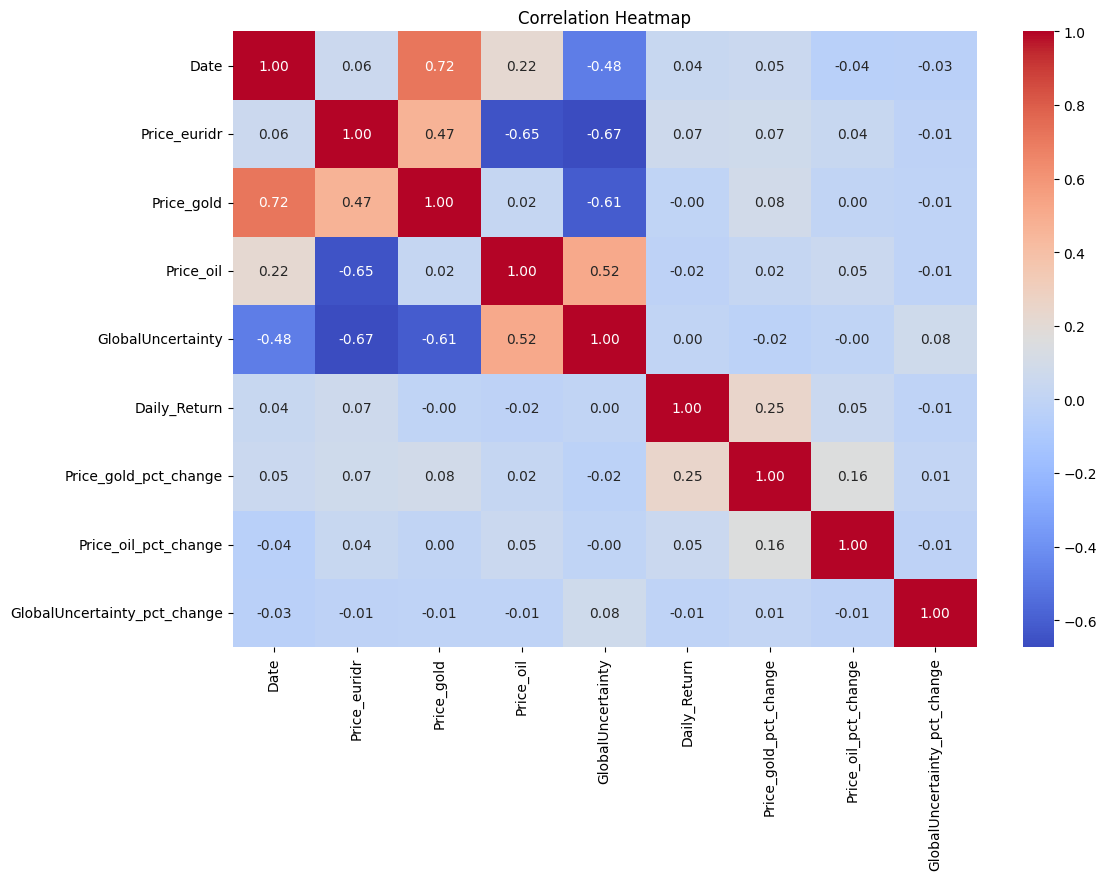

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = merged_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

TIME SERIES LINE PLOTS

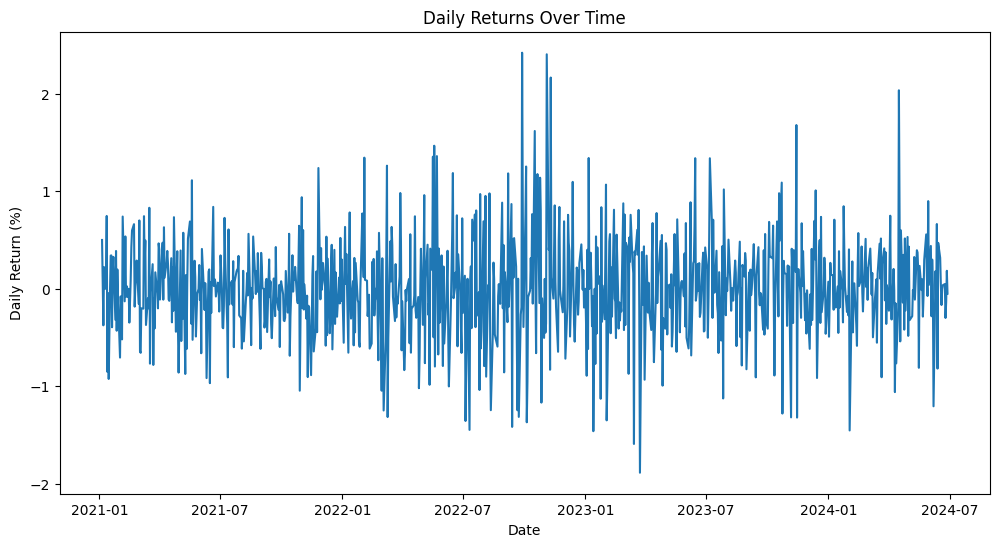

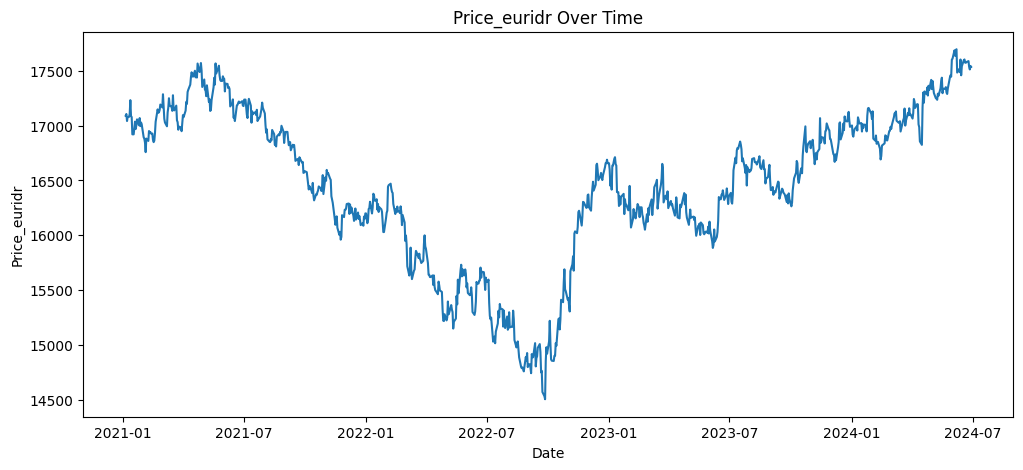

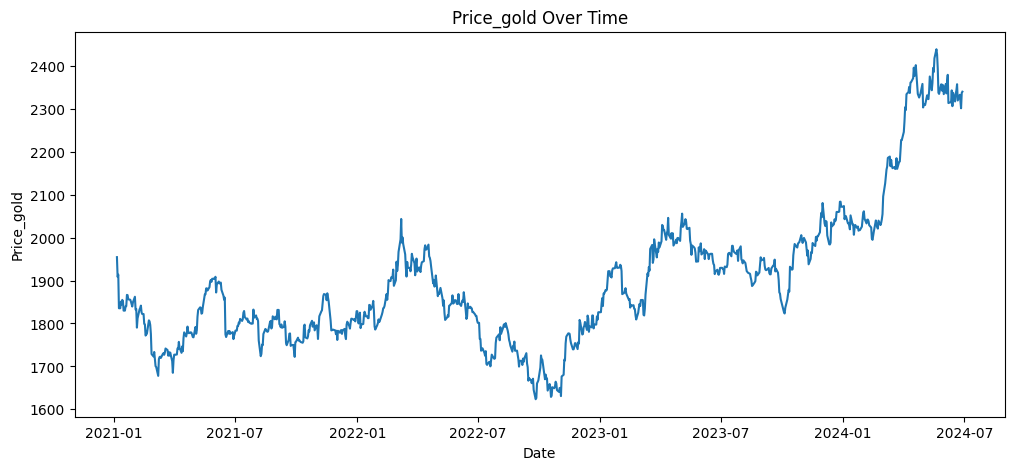

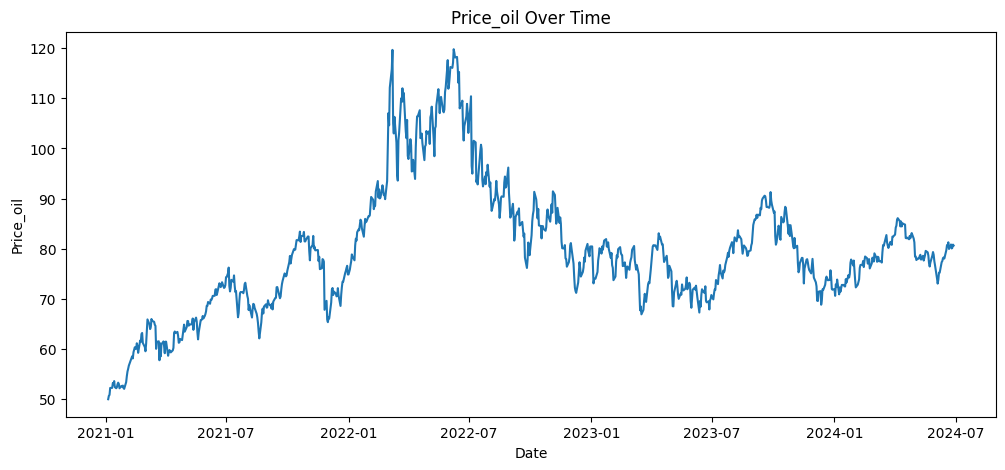

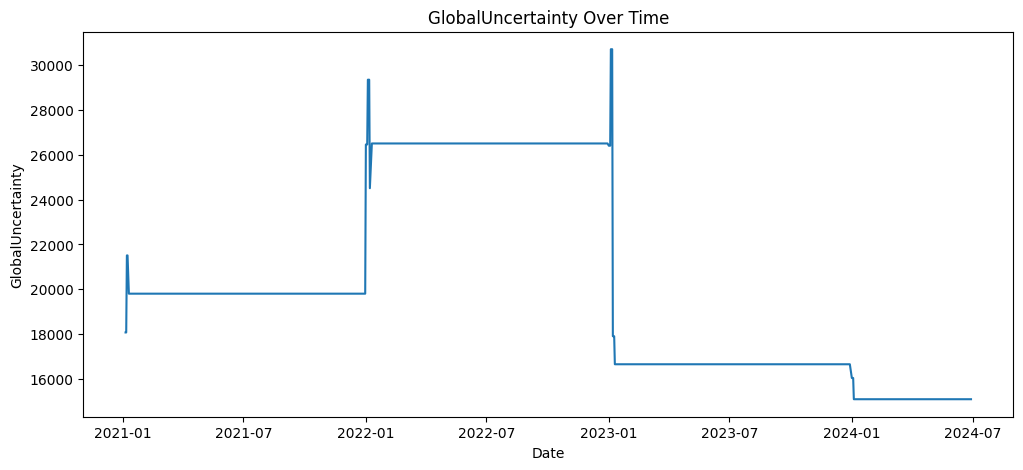

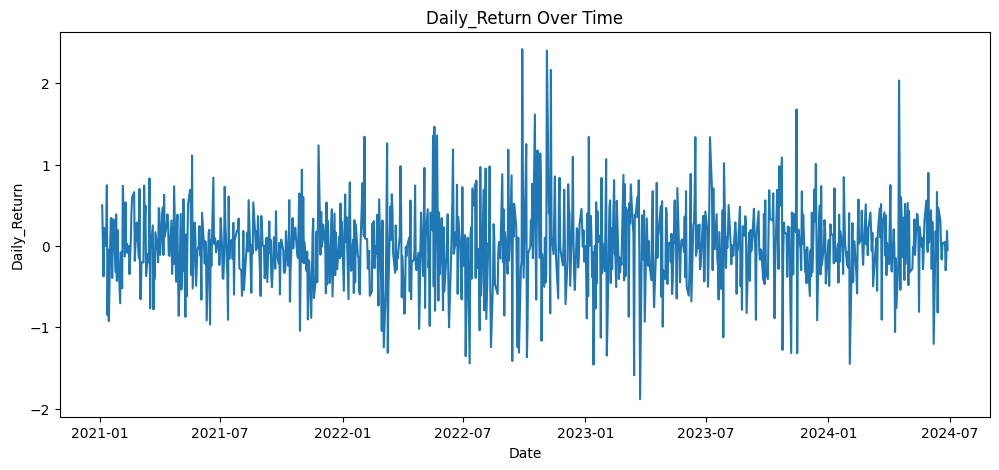

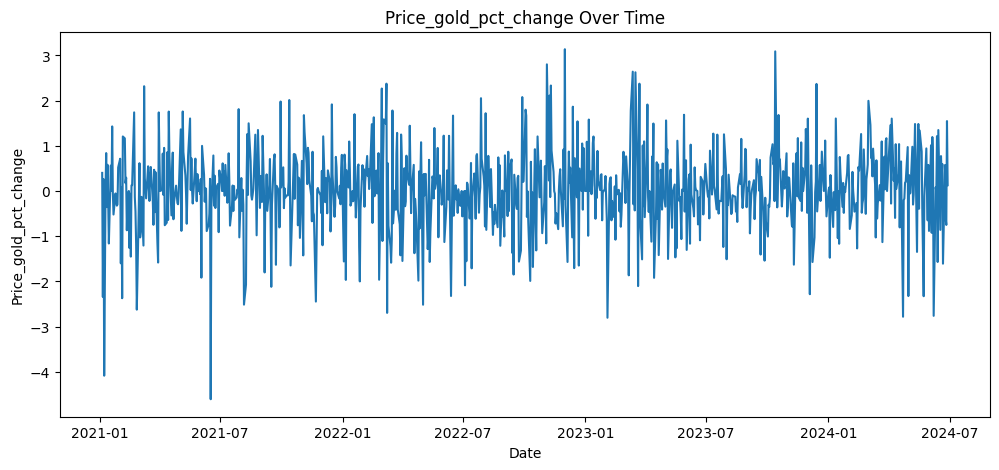

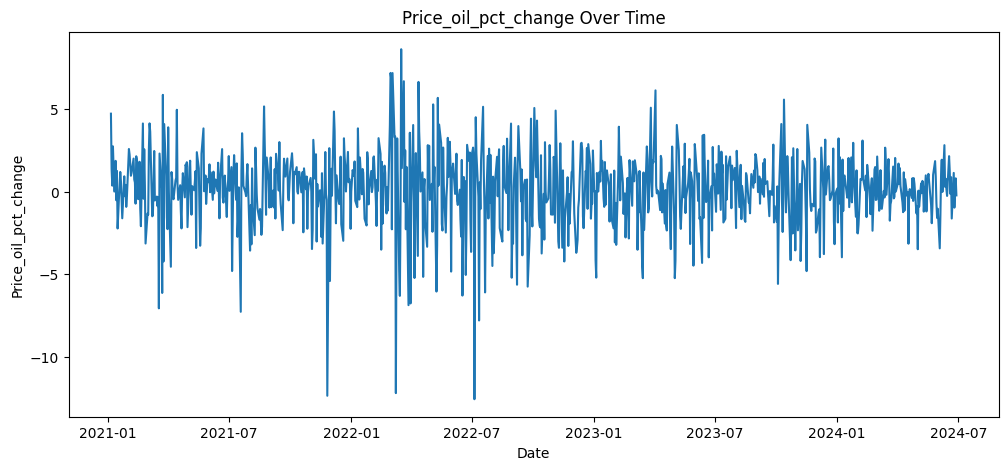

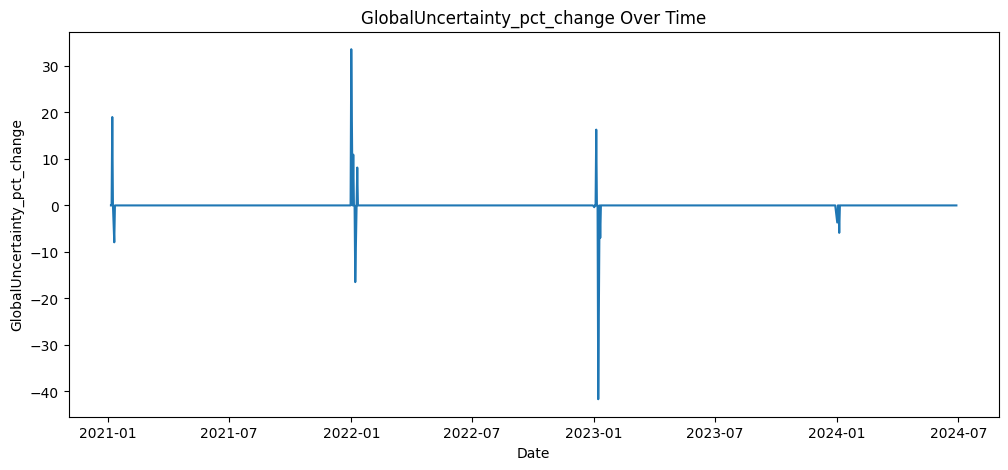

In [23]:
plt.figure(figsize=(12,6))
plt.plot(merged_df["Date"], merged_df["Daily_Return"])
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.show()

# Plot each original variable
for col in merged_df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(12,5))
    plt.plot(merged_df["Date"], merged_df[col])
    plt.title(f"{col} Over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()

Scatterplots (EDA)

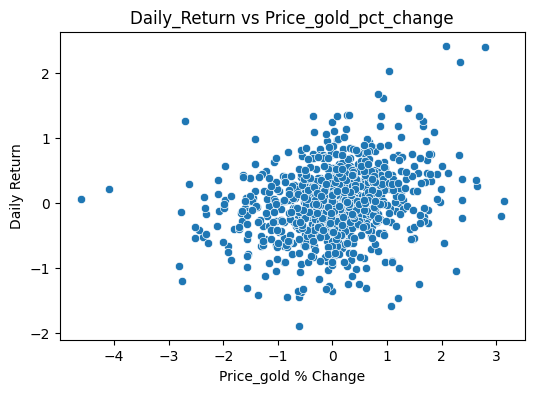

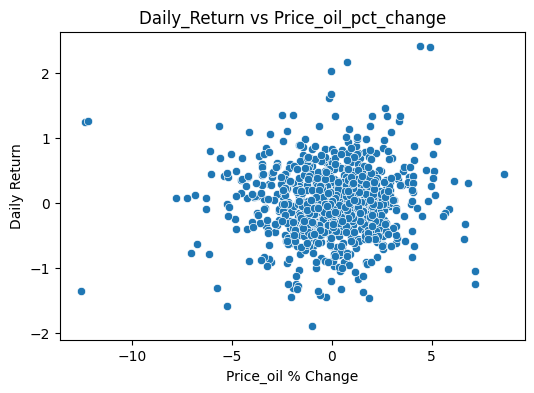

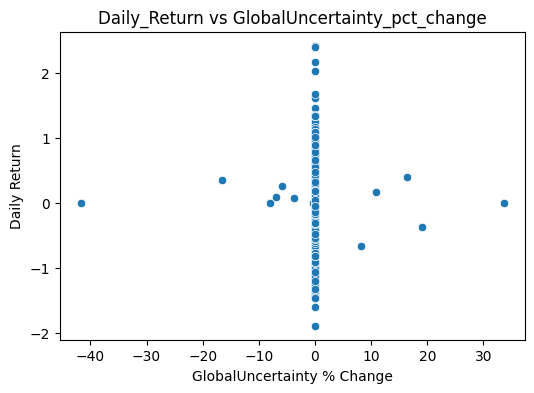

In [24]:
target = "Daily_Return"

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=merged_df[col + "_pct_change"], y=merged_df[target])
    plt.title(f"{target} vs {col}_pct_change")
    plt.xlabel(col + " % Change")
    plt.ylabel("Daily Return")
    plt.show()

TEXT INSIGHTS (AUTO-GENERATED SUMMARY)

In [25]:
print("=== INSIGHTS AND ANALYSIS ===\n")

# Strong correlation threshold
threshold = 0.5

strong_corr = corr["Daily_Return"].abs().sort_values(ascending=False)
print("Variables most correlated with Daily_Return:")
print(strong_corr[strong_corr > threshold])

print("\nInterpretation:")
print("- Positive correlation → when the feature increases, currency return increases.")
print("- Negative correlation → when the feature rises, currency returns decrease.")

print("\nSuggested Report Summary:")
print("""
1. Daily returns were computed to identify short-term volatility.
2. Percentage changes were created for all macroeconomic variables for comparability.
3. Descriptive statistics show the overall distribution of each feature.
4. Correlation analysis reveals which variables have the strongest influence on currency movements.
5. Time-series plots show long-term patterns and abnormalities in the data.
6. Scatterplots indicate how each explanatory variable interacts with EURIDR returns.
""")

=== INSIGHTS AND ANALYSIS ===

Variables most correlated with Daily_Return:
Daily_Return    1.0
Name: Daily_Return, dtype: float64

Interpretation:
- Positive correlation → when the feature increases, currency return increases.
- Negative correlation → when the feature rises, currency returns decrease.

Suggested Report Summary:

1. Daily returns were computed to identify short-term volatility.
2. Percentage changes were created for all macroeconomic variables for comparability.
3. Descriptive statistics show the overall distribution of each feature.
4. Correlation analysis reveals which variables have the strongest influence on currency movements.
5. Time-series plots show long-term patterns and abnormalities in the data.
6. Scatterplots indicate how each explanatory variable interacts with EURIDR returns.



**Predictive Modelling**

**Data Splitting**

In [26]:
from sklearn.model_selection import train_test_split

# Define target and features
y = merged_df['Daily_Return']
X = merged_df[['Price_gold', 'Price_oil', 'GlobalUncertainty']]

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (743, 3)
X_test shape: (186, 3)
y_train shape: (743,)
y_test shape: (186,)


**Model Development**

In [27]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Initialize models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Optional: 5-fold cross-validation for baseline performance
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
xgb_cv = cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2')

print("RF 5-fold CV R² mean:", rf_cv.mean())
print("XGB 5-fold CV R² mean:", xgb_cv.mean())


RF 5-fold CV R² mean: -0.33070921312286033
XGB 5-fold CV R² mean: -0.6346792191369819


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Fit models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

# Evaluation function
def evaluate_model(y_train, y_test, train_pred, test_pred, model_name):
    print(f"===== {model_name} Performance =====")
    print("Train R²:", r2_score(y_train, train_pred))
    print("Train RMSE:", np.sqrt(mean_squared_error(y_train, train_pred)))
    print("Train MAE:", mean_absolute_error(y_train, train_pred))
    print("-------------------------------")
    print("Test R²:", r2_score(y_test, test_pred))
    print("Test RMSE:", np.sqrt(mean_squared_error(y_test, test_pred)))
    print("Test MAE:", mean_absolute_error(y_test, test_pred))
    print("\n")

# Evaluate
evaluate_model(y_train, y_test, rf_train_pred, rf_test_pred, "Random Forest")
evaluate_model(y_train, y_test, xgb_train_pred, xgb_test_pred, "XGBoost")


===== Random Forest Performance =====
Train R²: 0.8308316716885623
Train RMSE: 0.21428007064770685
Train MAE: 0.16080110911568798
-------------------------------
Test R²: -0.2895384972678112
Test RMSE: 0.5693464785487703
Test MAE: 0.42603837440232095


===== XGBoost Performance =====
Train R²: 0.9224886411659037
Train RMSE: 0.14504572303008526
Train MAE: 0.10651244713099862
-------------------------------
Test R²: -0.57985999492153
Test RMSE: 0.6301860480773466
Test MAE: 0.4641361959763604




**Parameter Tuning**

In [29]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 0.8, None]
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

print("Best RF parameters:", rf_search.best_params_)

# Evaluate tuned RF
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)
evaluate_model(y_train, y_test, rf_train_pred, rf_test_pred, "Random Forest (Tuned)")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RF parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 3}
===== Random Forest (Tuned) Performance =====
Train R²: 0.02998800230319576
Train RMSE: 0.5131103854995023
Train MAE: 0.3824384594647952
-------------------------------
Test R²: 0.0028838979439309576
Test RMSE: 0.5006478410500547
Test MAE: 0.37987572131120845




In [30]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

xgb_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

print("Best XGB parameters:", xgb_search.best_params_)

# Evaluate tuned XGB
xgb_train_pred = best_xgb.predict(X_train)
xgb_test_pred = best_xgb.predict(X_test)
evaluate_model(y_train, y_test, xgb_train_pred, xgb_test_pred, "XGBoost (Tuned)")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGB parameters: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
===== XGBoost (Tuned) Performance =====
Train R²: 0.026021368003319112
Train RMSE: 0.5141584368442471
Train MAE: 0.3835155949684716
-------------------------------
Test R²: 0.002873482567378516
Test RMSE: 0.5006504558018159
Test MAE: 0.3775309273105798




In [31]:
import pandas as pd

# Feature importances for Tuned Random Forest
rf_feature_importances = best_rf.feature_importances_
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest (Tuned) Feature Importance:")
display(rf_feature_importance_df)

# Feature importances for Tuned XGBoost
xgb_feature_importances = best_xgb.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost (Tuned) Feature Importance:")
display(xgb_feature_importance_df)

Random Forest (Tuned) Feature Importance:


,Feature,Importance
0,Price_gold,0.449799
1,Price_oil,0.433000
2,GlobalUncertainty,0.117201



XGBoost (Tuned) Feature Importance:


,Feature,Importance
0,Price_gold,0.370940
2,GlobalUncertainty,0.321011
1,Price_oil,0.308048


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# The 'X' DataFrame used for modeling (from train_test_split) is already available.
# We will apply PCA to this X DataFrame, which contains all the features prepared earlier.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

loading_factors = pca.components_.T

loading_factors_df = pd.DataFrame(loading_factors, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)


print("PCA Loading Factors (with updated X):")
display(loading_factors_df)

PCA Loading Factors (with updated X):


,PC1,PC2,PC3
Price_gold,-0.539038,0.644568,0.542190
Price_oil,0.450038,0.764532,-0.461472
GlobalUncertainty,0.711972,0.004745,0.702192
